# Prediction of Video Game Sales using Regression
As someone who loves grabbing my Nintendo Switch to break away from reality, one of the most exciting yet complex parts of being a gamer is buying a new game, just because there are so many things to consider. A lot of factors can make or break a game's commercial success, including the hype around it, customer satisfaction, the console its launched on and several other intangibles. So I thought it would be interesting to try and quantify these as best possible using a video game sales-reviews dataset (latest as of 2016) from kaggle and building a regression model to predict future sales of games.

## Contents
1. Data Pre-Processing
2. Exploratory Data Analysis
3. Comparing Different Regression Models
4. Conclusion and Deployment of Final Model 

### 1. Data Pre-Processing

In [1]:
# Loading Standard Libraries for Data Handling
import pandas as pd
import numpy as np

In [2]:
# Loading Dataset downloaded from Kaggle
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Checking for NaN values
for i in df.columns:
    print('{} : {}'.format(i,df[i].isnull().values.sum()))

Name : 2
Platform : 0
Year_of_Release : 269
Genre : 2
Publisher : 54
NA_Sales : 0
EU_Sales : 0
JP_Sales : 0
Other_Sales : 0
Global_Sales : 0
Critic_Score : 8582
Critic_Count : 8582
User_Score : 6704
User_Count : 9129
Developer : 6623
Rating : 6769


In [4]:
# Checking no. of unique values
for i in df.columns:
    print('{} : {}'.format(i,len(df[i].unique())))

Name : 11563
Platform : 31
Year_of_Release : 40
Genre : 13
Publisher : 582
NA_Sales : 402
EU_Sales : 307
JP_Sales : 244
Other_Sales : 155
Global_Sales : 629
Critic_Score : 83
Critic_Count : 107
User_Score : 97
User_Count : 889
Developer : 1697
Rating : 9


In [5]:
# Checking for data types
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [6]:
df = df[['Name','Platform','Year_of_Release','Genre','Publisher','Critic_Score','Critic_Count','User_Score','User_Count','Rating','Global_Sales']]
df = df.dropna()
df['User_Score'] = pd.to_numeric(df['User_Score'])
df.shape

(6825, 11)

In [7]:
df['Platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [8]:
# Adjusting for platform series
Platform_Map = pd.DataFrame({'Platform':['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC', 'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'],
                             'Platform_New':['Wii', 'DS', 'XB', 'PS', 'PS', 'DS', 'PS', 'PS', 'XB', 'PC', 'PSP', 'Wii', 'GC', 'GBA', 'XB', 'PSV', 'DC']})
df = pd.merge(df,Platform_Map,how='left')
df['Platform'] = df['Platform_New']
df = df.drop(['Platform_New'],axis=1)
df['Platform'].unique()

array(['Wii', 'DS', 'XB', 'PS', 'PC', 'PSP', 'GC', 'GBA', 'PSV', 'DC'],
      dtype=object)

In [9]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,76.0,51.0,8.0,322.0,E,82.53
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,82.0,73.0,8.3,709.0,E,35.52
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,80.0,73.0,8.0,192.0,E,32.77
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,89.0,65.0,8.5,431.0,E,29.80
4,Wii Play,Wii,2006.0,Misc,Nintendo,58.0,41.0,6.6,129.0,E,28.92
...,...,...,...,...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,46.0,4.0,2.4,21.0,E,0.01
6821,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,81.0,12.0,8.8,9.0,M,0.01
6822,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,80.0,20.0,7.6,412.0,M,0.01
6823,Breach,PC,2011.0,Shooter,Destineer,61.0,12.0,5.8,43.0,T,0.01


### 2. Exploratory Data Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Global Sales (in Millions)')

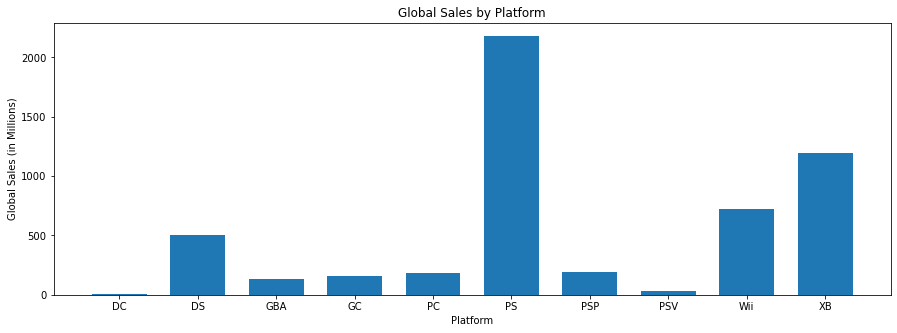

In [11]:
# Sales by Platform
df_platform = df.groupby('Platform').agg({'Global_Sales':sum})
plt.figure(figsize=(15,5))
plt.bar(df_platform.index,df_platform['Global_Sales'],width=0.7)
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in Millions)')

Text(0, 0.5, 'Global Sales (in Millions)')

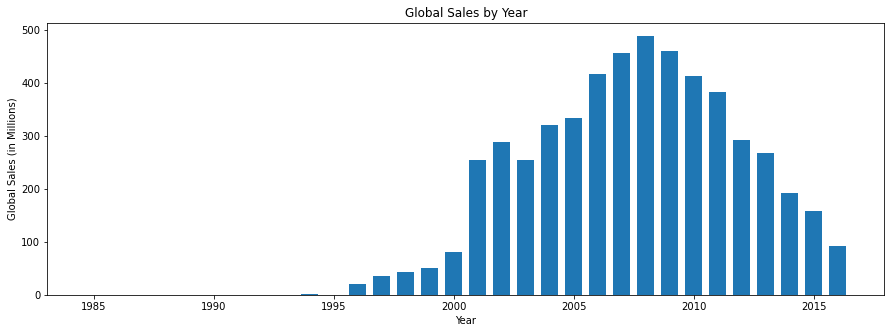

In [12]:
# Sales by Year
df_year = df.groupby('Year_of_Release').agg({'Global_Sales':sum})
plt.figure(figsize=(15,5))
plt.bar(df_year.index,df_year['Global_Sales'],width=0.7)
plt.title('Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (in Millions)')

Text(0, 0.5, 'Global Sales (in Millions)')

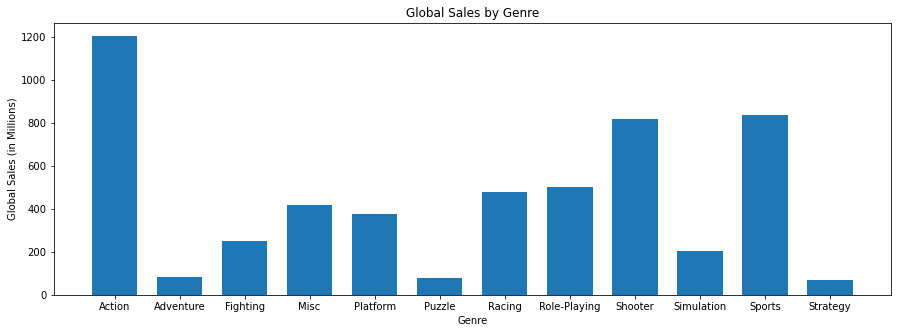

In [13]:
# Sales by Genre
df_genre = df.groupby('Genre').agg({'Global_Sales':sum})
plt.figure(figsize=(15,5))
plt.bar(df_genre.index,df_genre['Global_Sales'],width=0.7)
plt.title('Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in Millions)')

Text(0, 0.5, 'Global Sales (in Millions)')

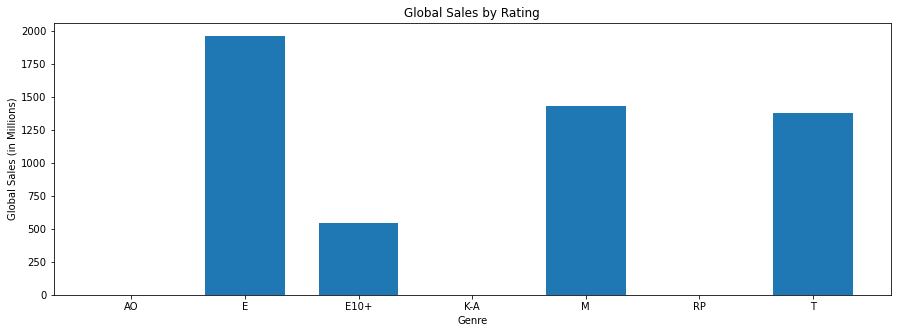

In [14]:
# Sales by Rating
df_rating = df.groupby('Rating').agg({'Global_Sales':sum})
plt.figure(figsize=(15,5))
plt.bar(df_rating.index,df_rating['Global_Sales'],width=0.7)
plt.title('Global Sales by Rating')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in Millions)')

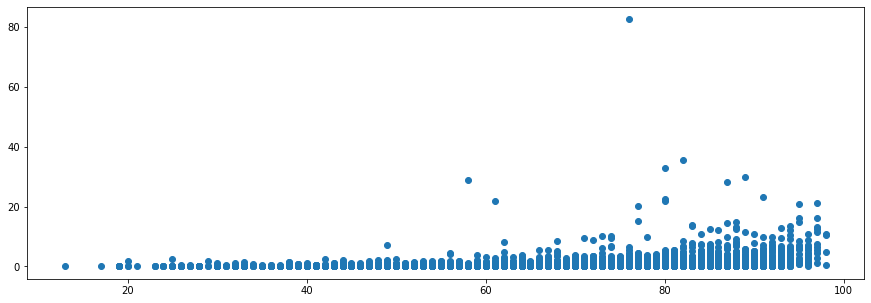

In [15]:
# Critic Score - Global Sales Scatter Plot
plt.figure(figsize=(15,5))
plt.scatter(df['Critic_Score'],df['Global_Sales'])

In [16]:
# Removing Outliers
df = df[df['Global_Sales'] < 60.0]

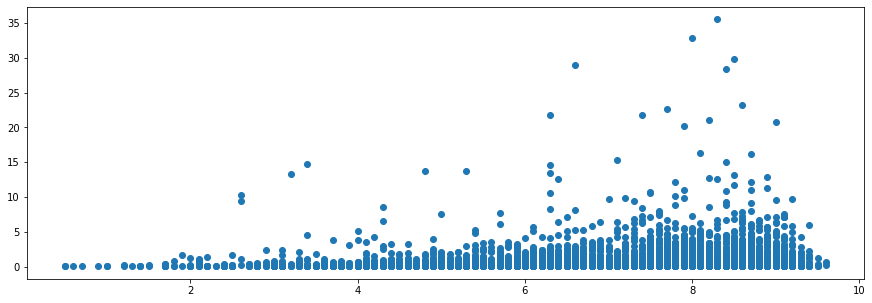

In [17]:
# User Score - Global Sales Scatter Plot
plt.figure(figsize=(15,5))
plt.scatter(df['User_Score'],df['Global_Sales'])

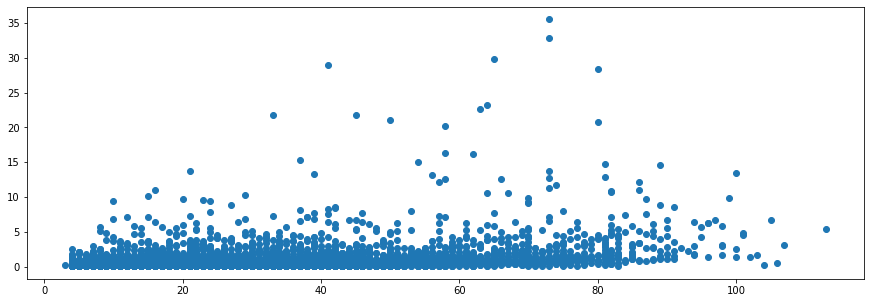

In [18]:
# Critic Count - Global Sales Scatter Plot
plt.figure(figsize=(15,5))
plt.scatter(df['Critic_Count'],df['Global_Sales'])

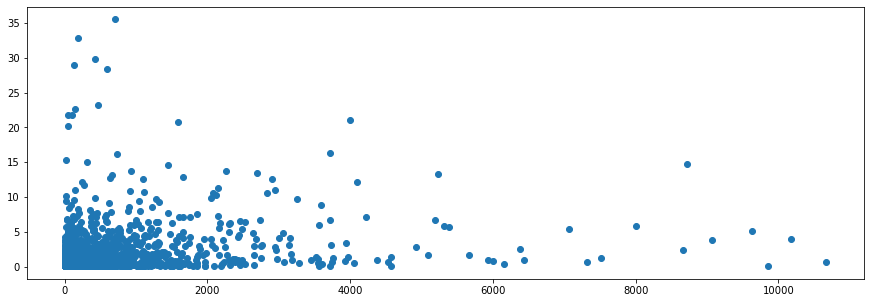

In [19]:
# User Count - Global Sales Scatter Plot
plt.figure(figsize=(15,5))
plt.scatter(df['User_Count'],df['Global_Sales'])

We observe that Global_Sales has an **expontential relationship** with User_Score, Critic_Score and Critic_Count. To aid in applying a regression model more easily, we can transform the Global_Sales using **logarithm function.**

In [20]:
import math
df['Log_Sales'] = df['Global_Sales'].apply(lambda x:math.log10(x))
df

<ipython-input-20-a04c2d0ae499>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log_Sales'] = df['Global_Sales'].apply(lambda x:math.log10(x))


,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Global_Sales,Log_Sales
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,82.0,73.0,8.3,709.0,E,35.52,1.550473
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,80.0,73.0,8.0,192.0,E,32.77,1.515476
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,89.0,65.0,8.5,431.0,E,29.80,1.474216
4,Wii Play,Wii,2006.0,Misc,Nintendo,58.0,41.0,6.6,129.0,E,28.92,1.461198
5,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,87.0,80.0,8.4,594.0,E,28.32,1.452093
...,...,...,...,...,...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,46.0,4.0,2.4,21.0,E,0.01,-2.000000
6821,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,81.0,12.0,8.8,9.0,M,0.01,-2.000000
6822,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,80.0,20.0,7.6,412.0,M,0.01,-2.000000
6823,Breach,PC,2011.0,Shooter,Destineer,61.0,12.0,5.8,43.0,T,0.01,-2.000000


<AxesSubplot:>

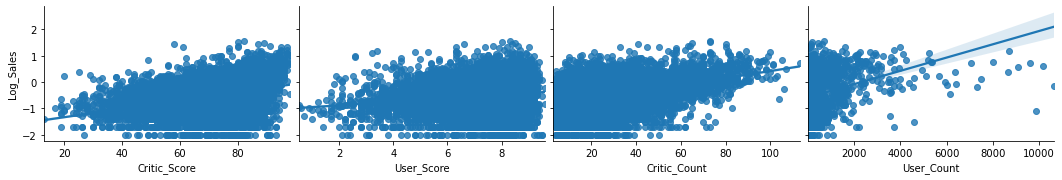

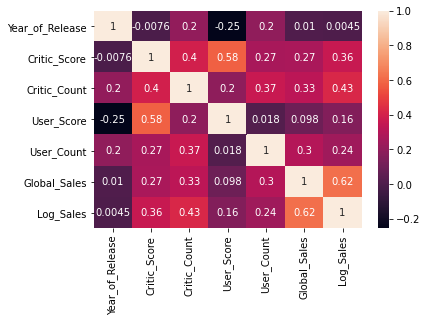

In [21]:
sns.pairplot(df,x_vars=['Critic_Score','User_Score','Critic_Count','User_Count'],y_vars='Log_Sales',aspect=1.5,kind='reg')
plt.figure()
sns.heatmap(df.corr(),annot=True)

We see some correlation between sales and features like Critic Score and Critic Count. This tells us that some features are slightly more important than others. To confirm this and eliminate the features that are not required, lets perform Principal Component Analysis (PCA) on the dataset.

In [39]:
# Scaling features and fitting PCA model
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)

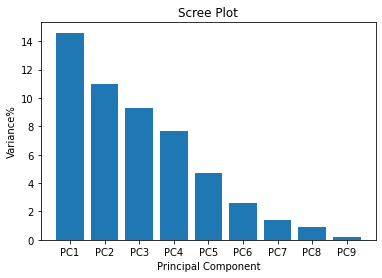

In [41]:
# Plotting a Scree Plot
pca_variance = np.round(pca.explained_variance_*100,decimals=1)
pca_labels = ['PC'+str(i) for i in range(1,10)]
plt.bar(x=range(1,10),height=pca_variance,tick_label=pca_labels)
plt.xlabel('Principal Component')
plt.ylabel('Variance%')
plt.title('Scree Plot')
plt.show()

In [53]:
# Calculating the Loading Scores
loading_scores_1 = pd.Series(pca.components_[0],index=X.columns)
loading_scores_1 = loading_scores_1.abs().sort_values(ascending=False)
loading_scores_2 = pd.Series(pca.components_[1],index=X.columns)
loading_scores_2 = loading_scores_2.abs().sort_values(ascending=False)
loading_scores_3 = pd.Series(pca.components_[2],index=X.columns)
loading_scores_3 = loading_scores_3.abs().sort_values(ascending=False)

loading_scores = loading_scores_1+loading_scores_2+loading_scores_3
loading_scores = loading_scores.abs().sort_values(ascending=False)
print(loading_scores)

Genre              1.685034
Rating             1.548730
Publisher          1.444949
Platform           0.481595
Critic_Count       0.291101
Critic_Score       0.210841
User_Score         0.127116
Year_of_Release    0.075909
User_Count         0.033734
dtype: float64


After performing the Principal Component Analysis and plotting a Scree Plot we can see that none of the Principal Components contribute to majority of the variance in the dataset, hence we can't remove any features. This tells us that even though there are some trends, the relation between sales and the features is more complex, hence requires a regression model to derive a relationship.

### 3. Comparing Different Regression Models
Now, lets apply some regression models to our dataset and see how they perform. We will be looking at mean absolute error, root mean square error but will be using the R-squared value to determine the best performing model. 

**a. Random Forest Regressor:** Since Random Forest Regressors provide really good off the shelf performance, and does not require extensive parameter tuning, we will be using this first.

In [22]:
# Converting Object Classes to Numeric Classes
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(df['Platform'])
df['Platform'] = le.transform(df['Platform'])

le.fit(df['Genre'])
df['Genre'] = le.transform(df['Genre'])

le.fit(df['Publisher'])
df['Publisher'] = le.transform(df['Publisher'])

le.fit(df['Rating'])
df['Rating'] = le.transform(df['Rating'])

<ipython-input-22-54bf79acf453>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Platform'] = le.transform(df['Platform'])
<ipython-input-22-54bf79acf453>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'] = le.transform(df['Genre'])
<ipython-input-22-54bf79acf453>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [23]:
# Performing the Train-Test Split
from sklearn.model_selection import train_test_split

X = df[['Platform','Year_of_Release','Genre','Publisher','Critic_Score','Critic_Count','User_Score','User_Count','Rating']]
y = df['Log_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [24]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

clf = RandomForestRegressor(n_estimators=500,random_state = 0).fit(X_train,y_train)
y_pred = clf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print("R_squared: Training={}; Test={}".format(clf.score(X_train,y_train),clf.score(X_test,y_test)))
print("MAE={}; MSE={}; RMSE={}".format(mae,mse,rmse))

R_squared: Training=0.940919387129189; Test=0.6093650933895318
MAE=0.2903903947830873; MSE=0.14464560874361526; RMSE=0.3803230320972098


The R-squared value we get from the Random Forest Regressor for the test-set is ~0.61 while it is ~0.94 for the training-set. This is a clear sign of overfitting and it leaves some room for improvement.

**b. Gradient Boosted Decision Tree:** The second model well be using is the GBDT Regressor. Though it is still an ensemble model known for its high plug-and-go performance, it can be optimized with some parameter tuning.

Text(0, 0.5, 'R_squared')

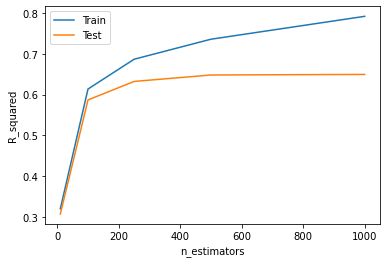

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

train = []
test = []

for ne in [10,100,250,500,1000]:
    clf = GradientBoostingRegressor(n_estimators=ne,random_state = 0).fit(X_train,y_train)
    train.append(clf.score(X_train,y_train))
    test.append(clf.score(X_test,y_test))

plt.plot([10,100,250,500,1000],train,label='Train')
plt.plot([10,100,250,500,1000],test,label='Test')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('R_squared')

While tuning parameters for Gradient Boosted Decision Tree, we tune for n_estimators first and then learning rate. From the chart above we can see the best value for n_estimators for Test-set accuracy while avoiding overfitting is 500. We then tune for learning rate below and plug in the values for R-squared and plug it into our model.

Text(0, 0.5, 'R_squared')

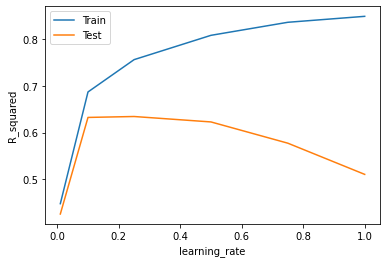

In [26]:
train = []
test = []

for lr in [0.01,0.1,0.25,0.5,0.75,1]:
    clf = GradientBoostingRegressor(n_estimators=250,learning_rate=lr,random_state = 0).fit(X_train,y_train)
    train.append(clf.score(X_train,y_train))
    test.append(clf.score(X_test,y_test))

plt.plot([0.01,0.1,0.25,0.5,0.75,1],train,label='Train')
plt.plot([0.01,0.1,0.25,0.5,0.75,1],test,label='Test')
plt.legend()
plt.xlabel('learning_rate')
plt.ylabel('R_squared')

In [27]:
clf = GradientBoostingRegressor(n_estimators=500,learning_rate=0.1,random_state = 0).fit(X_train,y_train)
y_pred = clf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print("R_squared: Training={}; Test={}".format(clf.score(X_train,y_train),clf.score(X_test,y_test)))
print("MAE={}; MSE={}; RMSE={}".format(mae,mse,rmse))

R_squared: Training=0.7360536545669545; Test=0.6482021052131324
MAE=0.2760581044908504; MSE=0.1302649092158861; RMSE=0.3609223035722316


Our Gradient Boosted model does not seem to overfit the training data like the Random Forest model and also has an improved R-squared value of ~0.65. We will now try a linear model to see if we can improve our performance.

**c. Support Vector Machine:** The first linear model we will be using is a SVM. We will be using Radial Basis Function Kernel as it would be the best fit for the way our data is distributed. Unlike the decision tree ensembles we used prior to this model, SVM requires scaling of features to get the best performance. We will be using MinMaxScaler for scaling.

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
from sklearn.svm import SVR
for gam in [0.001,0.01,0.1,1,10,100]:
    clf = SVR(kernel='rbf',gamma=gam).fit(X_train_scaled,y_train)
    print('Gamma={} Train Score: {}'.format(gam,clf.score(X_train_scaled,y_train)))
    print('Gamma={} Test Score: {}'.format(gam,clf.score(X_test_scaled,y_test)))

Gamma=0.001 Train Score: 0.15835998034431054
Gamma=0.001 Test Score: 0.1637536773744417
Gamma=0.01 Train Score: 0.2524946952861191
Gamma=0.01 Test Score: 0.26565833374190384
Gamma=0.1 Train Score: 0.2866585100725625
Gamma=0.1 Test Score: 0.293683260784388
Gamma=1 Train Score: 0.4102407358790018
Gamma=1 Test Score: 0.37657879887086176
Gamma=10 Train Score: 0.7444255059000688
Gamma=10 Test Score: 0.4055396063013472
Gamma=100 Train Score: 0.9524826801356695
Gamma=100 Test Score: 0.15180456010458998


In [38]:
for c_val in [1,5,10,25,50,75,100]:
    clf = SVR(kernel='rbf',gamma=10,C=c_val).fit(X_train_scaled,y_train)
    print('C={} Train Score: {}'.format(c_val,clf.score(X_train_scaled,y_train)))
    print('C={} Test Score: {}'.format(c_val,clf.score(X_test_scaled,y_test)))

C=1 Train Score: 0.7444255059000688
C=1 Test Score: 0.4055396063013472
C=5 Train Score: 0.8801430955118007
C=5 Test Score: 0.34870069515072577
C=10 Train Score: 0.9164555649880872
C=10 Test Score: 0.307294907447592
C=25 Train Score: 0.9474153866676784
C=25 Test Score: 0.23427147771480872
C=50 Train Score: 0.9584050475081303
C=50 Test Score: 0.1671284490486289
C=75 Train Score: 0.9625572049011795
C=75 Test Score: 0.13652416369117515
C=100 Train Score: 0.9645634334416382
C=100 Test Score: 0.11540760065327937


In [121]:
clf = SVR(kernel='rbf',gamma=10,C=1).fit(X_train_scaled,y_train)
y_pred = clf.predict(X_test_scaled)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print("R_squared: Training={}; Test={}".format(clf.score(X_train_scaled,y_train),clf.score(X_test_scaled,y_test)))
print("MAE={}; MSE={}; RMSE={}".format(mae,mse,rmse))

R_squared: Training=0.7444255059000688; Test=0.4055396063013472
MAE=0.36566943368724647; MSE=0.22011879651670274; RMSE=0.46916819640370205


We see that our SVM model does not achieve better performance than our ensemble models even after some parameter tuning.

### 4. Conclusion and Deployment of Final Model
After looking at three different models, we obtained the best R-squared value and lowest error values with our Gradient Boosted Decision Tree Regressor. Below we can see the accuracy values of this model

In [134]:
clf = GradientBoostingRegressor(n_estimators=500,learning_rate=0.1,random_state = 0).fit(X_train,y_train)
y_pred = clf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print("R_squared:\nTraining={}\nTest={}".format(clf.score(X_train,y_train),clf.score(X_test,y_test)))
print("\nError Values:\nMAE={}\nMSE={}\nRMSE={}".format(mae,mse,rmse))

R_squared:
Training=0.7360536545669545
Test=0.6482021052131324

Error Values:
MAE=0.2760581044908504
MSE=0.1302649092158861
RMSE=0.3609223035722316


We can also plot the feature importances to see which our features contributed most to the model.

Text(0.5, 1.0, 'Feature Importance')

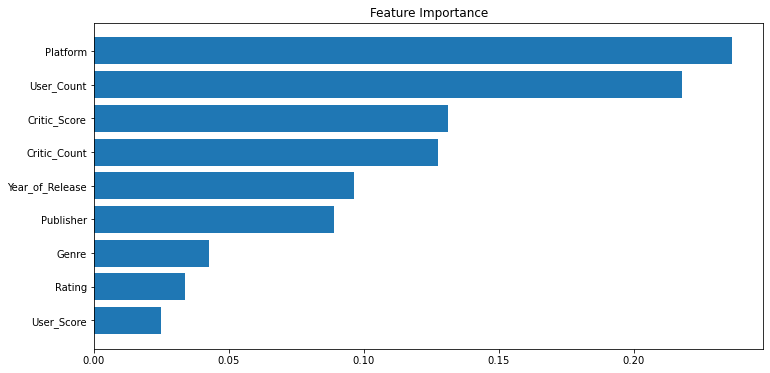

In [144]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')

Through this project not only did we build a model to predict future sales of newly released games, but we also have the features that are most responsible for determining the game's commercial success. The platform of the games was expected to be one of the most important features due to the differences in console popularity. However I did not expect Critic Score to be more important than Genre or User Score. This is just an example of how we can do so much using data in our day to day lives. This project has inspired me to find other applications of Data Science and Machine Learning in my immediate surroundings and embark on a journey of learning.